<a href="https://colab.research.google.com/github/ashu433/Trading_codes/blob/main/Sentiment_calculator_OI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**FII Stastics data cleaning**

In [ ]:
file_1="fii_stats_08-May-2023.xls"
file_2="fao_participant_oi_08052023.csv"
file_3="fao_participant_vol_08052023.csv"
Date="09-05-2023"

In [ ]:
FII_stats=pd.read_excel(file_1)
FII_stats.columns=FII_stats.iloc[0]
FII_stats=FII_stats.drop(0)
FII_stats.fillna(value=0,inplace=True)
FII_stats.head()

,NaN,BUY,BUY,SELL,SELL,OPEN INTEREST AT THE END OF THE DAY,NaN
1,0,No. of contracts,Amt in Crores,No. of contracts,Amt in Crores,No. of contracts,Amt in Crores
2,INDEX FUTURES,35275,3439.16,21938,2132.17,171320,16412.16
3,FINNIFTY FUTURES,35,2.69,34,2.62,1,0.08
4,BANKNIFTY FUTURES,12937,1397.95,7571,818.26,43264,4685.37
5,MIDCPNIFTY FUTURES,0,0.00,0,0.00,0,0.00


In [ ]:
FII_stats.columns = FII_stats.columns + '_' + FII_stats.iloc[0].astype(str)
FII_stats = FII_stats.iloc[1:]
FII_stats.head()

,NaN,BUY_No. of contracts,BUY_Amt in Crores,SELL_No. of contracts,SELL_Amt in Crores,OPEN INTEREST AT THE END OF THE DAY_No. of contracts,NaN
2,INDEX FUTURES,35275,3439.16,21938,2132.17,171320,16412.16
3,FINNIFTY FUTURES,35,2.69,34,2.62,1,0.08
4,BANKNIFTY FUTURES,12937,1397.95,7571,818.26,43264,4685.37
5,MIDCPNIFTY FUTURES,0,0.00,0,0.00,0,0.00
6,NIFTY FUTURES,22303,2038.52,14333,1311.29,128055,11726.71


In [ ]:
FII_stats = FII_stats.iloc[:, :-1]
FII_stats.head(16)

,NaN,BUY_No. of contracts,BUY_Amt in Crores,SELL_No. of contracts,SELL_Amt in Crores,OPEN INTEREST AT THE END OF THE DAY_No. of contracts
2,INDEX FUTURES,35275,3439.16,21938,2132.17,171320
3,FINNIFTY FUTURES,35,2.69,34,2.62,1
4,BANKNIFTY FUTURES,12937,1397.95,7571,818.26,43264
5,MIDCPNIFTY FUTURES,0,0.00,0,0.00,0
6,NIFTY FUTURES,22303,2038.52,14333,1311.29,128055
7,0,0,0,0,0,0
8,INDEX OPTIONS,13390924,1341600.19,13599077,1362692.49,3080064
9,NIFTY OPTIONS,3442476,314140.45,3531319,322967.77,1620428
10,FINNIFTY OPTIONS,1683511,129951.34,1743201,134535.10,417017
11,MIDCPNIFTY OPTIONS,0,0.00,0,0.00,0


In [ ]:
FII_stats = FII_stats.rename(columns={np.nan: 'TempName'})
FII_stats = FII_stats.rename(columns={'TempName': 'FII'})
FII_stats.head(16)

,FII,BUY_No. of contracts,BUY_Amt in Crores,SELL_No. of contracts,SELL_Amt in Crores,OPEN INTEREST AT THE END OF THE DAY_No. of contracts
2,INDEX FUTURES,35275,3439.16,21938,2132.17,171320
3,FINNIFTY FUTURES,35,2.69,34,2.62,1
4,BANKNIFTY FUTURES,12937,1397.95,7571,818.26,43264
5,MIDCPNIFTY FUTURES,0,0.00,0,0.00,0
6,NIFTY FUTURES,22303,2038.52,14333,1311.29,128055
7,0,0,0,0,0,0
8,INDEX OPTIONS,13390924,1341600.19,13599077,1362692.49,3080064
9,NIFTY OPTIONS,3442476,314140.45,3531319,322967.77,1620428
10,FINNIFTY OPTIONS,1683511,129951.34,1743201,134535.10,417017
11,MIDCPNIFTY OPTIONS,0,0.00,0,0.00,0


In [ ]:
# FII_stats=FII_stats.set_index("FII")
# FII_stats.head()

In [ ]:
statstics_data_FII=FII_stats[["FII","BUY_No. of contracts","SELL_No. of contracts","OPEN INTEREST AT THE END OF THE DAY_No. of contracts"]]
statstics_data_FII.head()

,FII,BUY_No. of contracts,SELL_No. of contracts,OPEN INTEREST AT THE END OF THE DAY_No. of contracts
2,INDEX FUTURES,35275,21938,171320
3,FINNIFTY FUTURES,35,34,1
4,BANKNIFTY FUTURES,12937,7571,43264
5,MIDCPNIFTY FUTURES,0,0,0
6,NIFTY FUTURES,22303,14333,128055


In [ ]:
Total_contracts=statstics_data_FII['BUY_No. of contracts'].astype(int) + statstics_data_FII['SELL_No. of contracts'].astype(int)
new_statstics_data_FII=pd.concat([statstics_data_FII,pd.DataFrame(Total_contracts)],axis=1)
new_statstics_data_FII=new_statstics_data_FII.rename(columns={0:"Total_Contracts"})
new_statstics_data_FII.head()

,FII,BUY_No. of contracts,SELL_No. of contracts,OPEN INTEREST AT THE END OF THE DAY_No. of contracts,Total_Contracts
2,INDEX FUTURES,35275,21938,171320,57213
3,FINNIFTY FUTURES,35,34,1,69
4,BANKNIFTY FUTURES,12937,7571,43264,20508
5,MIDCPNIFTY FUTURES,0,0,0,0
6,NIFTY FUTURES,22303,14333,128055,36636


**Participant_Wise_Data**

In [ ]:
participant_wise_data=pd.read_csv(file_2)
participant_wise_data.columns = participant_wise_data.iloc[0]
participant_wise_data=participant_wise_data.drop(0)
participant_wise_data=participant_wise_data.dropna(axis=1)
participant_wise_data.head()

,Client Type,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short\t,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts\t,Total Short Contracts
1,Client,178117,189538,1358752,259600,4292713,4156784,4337751,4205354,906225,454930,630281,488385,11347521,10110908
2,DII,48180,37401,51039,1382137,401,26090,0,0,0,30,86300,0,125740,1505838
3,FII,84435,86885,1192073,1048343,871702,892874,668089,647400,40009,42915,56312,39764,3124008,2546793
4,Pro,37662,34570,308059,219843,1301071,1305486,1460047,1528480,367721,359945,541062,329671,3679944,4113673
5,TOTAL,348394,348394,2909923,2909923,6465886,6381233,6465886,6381233,1313955,857820,1313955,857820,18277211,18277211


In [ ]:
f_o_data_index=participant_wise_data[["Client Type","Future Index Long","Future Index Short","Option Index Call Long","Option Index Call Short","Option Index Put Long","Option Index Put Short"]]
f_o_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short
1,Client,178117,189538,4292713,4337751,4156784,4205354
2,DII,48180,37401,401,0,26090,0
3,FII,84435,86885,871702,668089,892874,647400
4,Pro,37662,34570,1301071,1460047,1305486,1528480
5,TOTAL,348394,348394,6465886,6465886,6381233,6381233


In [ ]:
future_oi=f_o_data_index['Future Index Long'].astype(int)+f_o_data_index['Future Index Short'].astype(int)
Option_oi=f_o_data_index['Option Index Call Long'].astype(int)+f_o_data_index['Option Index Call Short'].astype(int)+f_o_data_index['Option Index Put Long'].astype(int)+f_o_data_index['Option Index Put Short'].astype(int)
new_f_o_data_index=pd.concat([f_o_data_index,pd.DataFrame(future_oi)],axis=1)
new_f_o_data_index=new_f_o_data_index.rename(columns={0:"Total_Future_OI"})
new_f_o_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Future_OI
1,Client,178117,189538,4292713,4337751,4156784,4205354,367655
2,DII,48180,37401,401,0,26090,0,85581
3,FII,84435,86885,871702,668089,892874,647400,171320
4,Pro,37662,34570,1301071,1460047,1305486,1528480,72232
5,TOTAL,348394,348394,6465886,6465886,6381233,6381233,696788


In [ ]:
new_f_o_data_index=pd.concat([new_f_o_data_index,pd.DataFrame(Option_oi)],axis=1)
new_f_o_data_index=new_f_o_data_index.rename(columns={0:"Total_Option_OI"})
new_f_o_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Future_OI,Total_Option_OI
1,Client,178117,189538,4292713,4337751,4156784,4205354,367655,16992602
2,DII,48180,37401,401,0,26090,0,85581,26491
3,FII,84435,86885,871702,668089,892874,647400,171320,3080065
4,Pro,37662,34570,1301071,1460047,1305486,1528480,72232,5595084
5,TOTAL,348394,348394,6465886,6465886,6381233,6381233,696788,25694238


**Participant_contract_wise_data_Cleaning**

In [ ]:
participant_wise_Volume_data=pd.read_csv(file_3)
participant_wise_Volume_data.columns = participant_wise_Volume_data.iloc[0]
participant_wise_Volume_data=participant_wise_Volume_data.drop(0)
participant_wise_Volume_data=participant_wise_Volume_data.dropna(axis=1)
participant_wise_Volume_data.head()

,Client Type,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short\t,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts\t,Total Short Contracts
1,Client,143785,150677,273747,289372,43471577,33363586,43634663,32982232,943292,380037,949492,342642,78576024,78349078
2,DII,0,12800,17995,25265,0,4688,0,256,0,0,9831,0,22683,48152
3,FII,35275,21938,202360,161060,7244655,6146269,7296340,6302737,137678,85802,136949,89315,13852039,14008339
4,Pro,92318,85963,340827,359232,64353431,59531040,64138660,59760358,1383483,754817,1368181,788699,126455916,126501093
5,TOTAL,271378,271378,834929,834929,115069663,99045583,115069663,99045583,2464453,1220656,2464453,1220656,218906662,218906662


In [ ]:
f_o_volume_data_index=participant_wise_Volume_data[["Client Type","Future Index Long","Future Index Short","Option Index Call Long","Option Index Call Short","Option Index Put Long","Option Index Put Short"]]
f_o_volume_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short
1,Client,143785,150677,43471577,43634663,33363586,32982232
2,DII,0,12800,0,0,4688,256
3,FII,35275,21938,7244655,7296340,6146269,6302737
4,Pro,92318,85963,64353431,64138660,59531040,59760358
5,TOTAL,271378,271378,115069663,115069663,99045583,99045583


In [ ]:
future_contracts=f_o_volume_data_index['Future Index Long'].astype(int)+f_o_volume_data_index['Future Index Short'].astype(int)
Option_contracts=f_o_volume_data_index['Option Index Call Long'].astype(int)+f_o_volume_data_index['Option Index Call Short'].astype(int)+f_o_volume_data_index['Option Index Put Long'].astype(int)+f_o_volume_data_index['Option Index Put Short'].astype(int)
new_f_o_volume_data_index=pd.concat([f_o_volume_data_index,pd.DataFrame(future_contracts)],axis=1)
new_f_o_volume_data_index=new_f_o_volume_data_index.rename(columns={0:"Total_Future_Contracts"})
new_f_o_volume_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Future_Contracts
1,Client,143785,150677,43471577,43634663,33363586,32982232,294462
2,DII,0,12800,0,0,4688,256,12800
3,FII,35275,21938,7244655,7296340,6146269,6302737,57213
4,Pro,92318,85963,64353431,64138660,59531040,59760358,178281
5,TOTAL,271378,271378,115069663,115069663,99045583,99045583,542756


In [ ]:
new_f_o_volume_data_index=pd.concat([new_f_o_volume_data_index,pd.DataFrame(Option_contracts)],axis=1)
new_f_o_volume_data_index=new_f_o_volume_data_index.rename(columns={0:"Total_Option_Contracts"})
new_f_o_volume_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Future_Contracts,Total_Option_Contracts
1,Client,143785,150677,43471577,43634663,33363586,32982232,294462,153452058
2,DII,0,12800,0,0,4688,256,12800,4944
3,FII,35275,21938,7244655,7296340,6146269,6302737,57213,26990001
4,Pro,92318,85963,64353431,64138660,59531040,59760358,178281,247783489
5,TOTAL,271378,271378,115069663,115069663,99045583,99045583,542756,428230492


**Data Processing**

In [ ]:
new_statstics_data_FII.head(16)

,FII,BUY_No. of contracts,SELL_No. of contracts,OPEN INTEREST AT THE END OF THE DAY_No. of contracts,Total_Contracts
2,INDEX FUTURES,35275,21938,171320,57213
3,FINNIFTY FUTURES,35,34,1,69
4,BANKNIFTY FUTURES,12937,7571,43264,20508
5,MIDCPNIFTY FUTURES,0,0,0,0
6,NIFTY FUTURES,22303,14333,128055,36636
7,0,0,0,0,0
8,INDEX OPTIONS,13390924,13599077,3080064,26990001
9,NIFTY OPTIONS,3442476,3531319,1620428,6973795
10,FINNIFTY OPTIONS,1683511,1743201,417017,3426712
11,MIDCPNIFTY OPTIONS,0,0,0,0


In [ ]:
new_f_o_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Future_OI,Total_Option_OI
1,Client,178117,189538,4292713,4337751,4156784,4205354,367655,16992602
2,DII,48180,37401,401,0,26090,0,85581,26491
3,FII,84435,86885,871702,668089,892874,647400,171320,3080065
4,Pro,37662,34570,1301071,1460047,1305486,1528480,72232,5595084
5,TOTAL,348394,348394,6465886,6465886,6381233,6381233,696788,25694238


In [ ]:
new_f_o_volume_data_index.head()

,Client Type,Future Index Long,Future Index Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Future_Contracts,Total_Option_Contracts
1,Client,143785,150677,43471577,43634663,33363586,32982232,294462,153452058
2,DII,0,12800,0,0,4688,256,12800,4944
3,FII,35275,21938,7244655,7296340,6146269,6302737,57213,26990001
4,Pro,92318,85963,64353431,64138660,59531040,59760358,178281,247783489
5,TOTAL,271378,271378,115069663,115069663,99045583,99045583,542756,428230492


In [ ]:
FII_future_statics_report=new_statstics_data_FII.iloc[0,2]
FII_option_statics_report=new_statstics_data_FII.iloc[6,2]
FII_future_contract_statics_report=new_statstics_data_FII.iloc[0,3]
FII_option_contract_statics_report=new_statstics_data_FII.iloc[6,3]
FII_future_participant_wise_report=new_f_o_data_index.iloc[2,7]
FII_option_participant_wise_report=new_f_o_data_index.iloc[2,8]
FII_volume_future_participant_wise_report=new_f_o_volume_data_index.iloc[2,7]
FII_volume_option_participant_wise_report=new_f_o_volume_data_index.iloc[2,8]

In [ ]:
x=float(FII_future_participant_wise_report)/float(FII_future_statics_report)
y=float(FII_option_participant_wise_report)/float(FII_option_statics_report)
z=float(FII_volume_future_participant_wise_report)/float(FII_future_contract_statics_report)
m=float(FII_volume_option_participant_wise_report)/float(FII_option_contract_statics_report)

In [ ]:
data = {'Future_OI': [x], 'Option_OI': [y], 'Future_contract': [z],'Option_contract': [m]}
df = pd.DataFrame(data)
df

,Future_OI,Option_OI,Future_contract,Option_contract
0,7.809281,0.226491,0.333954,8.762805


**Future Data analysis**

In [ ]:
future_data=new_f_o_data_index[["Client Type","Future Index Long","Future Index Short","Total_Future_OI"]]
percentage_long=(future_data["Future Index Long"].astype(float)/future_data["Total_Future_OI"].astype(float))*100
percentage_short=(future_data["Future Index Short"].astype(float)/future_data["Total_Future_OI"].astype(float))*100
total_long_absolute=future_data["Future Index Long"].astype(float)-future_data["Future Index Short"].astype(float)
future_data=pd.concat([future_data,pd.DataFrame(percentage_long)],axis=1)
future_data=future_data.rename(columns={0:"percentage_long"})

In [ ]:
future_data=pd.concat([future_data,pd.DataFrame(percentage_short)],axis=1)
future_data=future_data.rename(columns={0:"percentage_short"})

In [ ]:
future_data=pd.concat([future_data,pd.DataFrame(total_long_absolute)],axis=1)
future_data=future_data.rename(columns={0:"total_long_absolute"})
future_data.head()

,Client Type,Future Index Long,Future Index Short,Total_Future_OI,percentage_long,percentage_short,total_long_absolute
1,Client,178117,189538,367655,48.446778,51.553222,-11421.0
2,DII,48180,37401,85581,56.297543,43.702457,10779.0
3,FII,84435,86885,171320,49.284964,50.715036,-2450.0
4,Pro,37662,34570,72232,52.140326,47.859674,3092.0
5,TOTAL,348394,348394,696788,50.000000,50.000000,0.0


In [ ]:
future_data = future_data.drop(future_data.index[-1])
future_data.head(10)

,Client Type,Future Index Long,Future Index Short,Total_Future_OI,percentage_long,percentage_short,total_long_absolute
1,Client,178117,189538,367655,48.446778,51.553222,-11421.0
2,DII,48180,37401,85581,56.297543,43.702457,10779.0
3,FII,84435,86885,171320,49.284964,50.715036,-2450.0
4,Pro,37662,34570,72232,52.140326,47.859674,3092.0


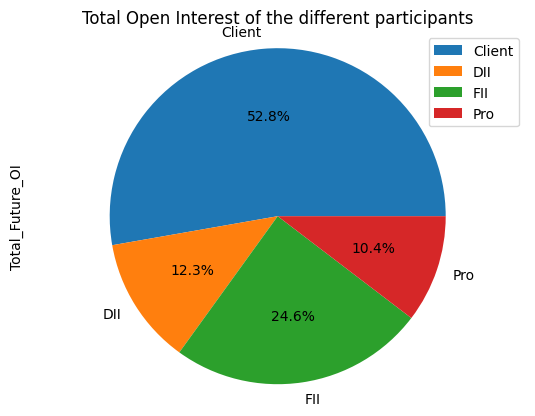

In [ ]:
future_data.plot(kind='pie', y="Total_Future_OI", labels=future_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Open Interest of the different participants')
plt.axis('equal')
plt.show()

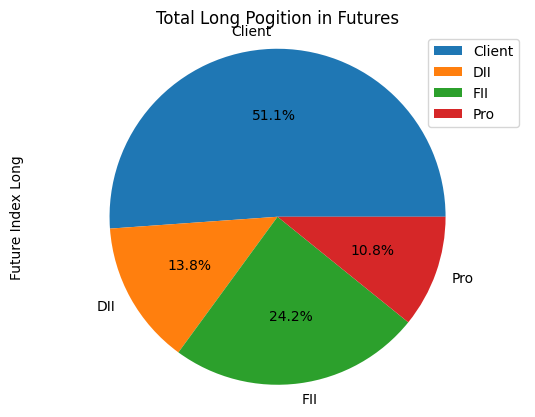

In [ ]:
future_data["Future Index Long"]=future_data["Future Index Long"].astype(int)
future_data.plot(kind='pie', y="Future Index Long", labels=future_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Long Pogition in Futures')
plt.axis('equal')
plt.show()

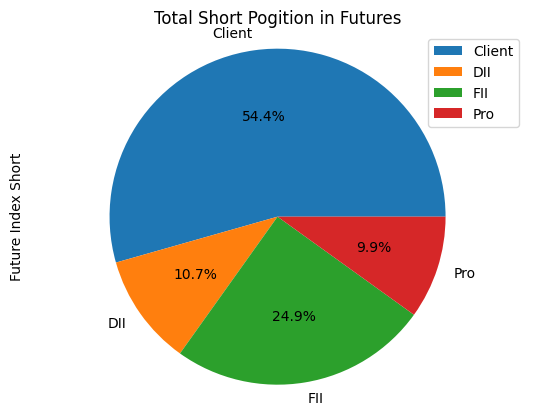

In [ ]:
future_data["Future Index Short"]=future_data["Future Index Short"].astype(int)
future_data.plot(kind='pie', y="Future Index Short", labels=future_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Short Pogition in Futures')
plt.axis('equal')
plt.show()

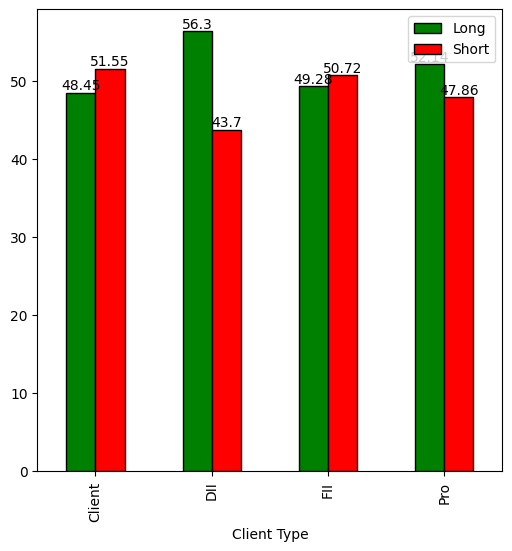

In [ ]:
long_short=future_data[["percentage_long","percentage_short"]]
long_short=long_short.round(2)
long_short.set_index(future_data["Client Type"], inplace=True)
ax = long_short.plot(kind='bar',color=['green', 'red'], edgecolor='black')
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', fontsize=10)
ax.legend(['Long','Short'])
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

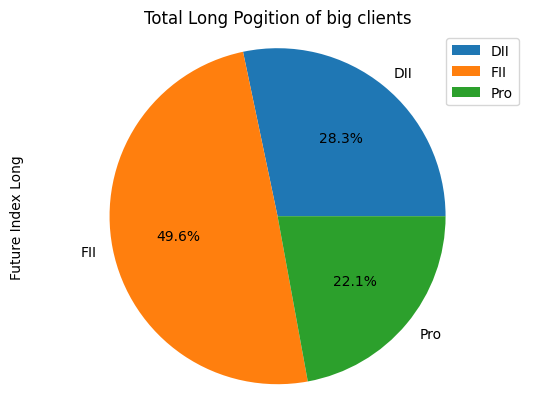

In [ ]:
Big_Institution_data_futures = future_data.drop(index=1)
Big_Institution_data_futures.plot(kind='pie', y="Future Index Long", labels=Big_Institution_data_futures['Client Type'], autopct='%1.1f%%')
plt.title('Total Long Pogition of big clients')
plt.axis('equal')
plt.show()

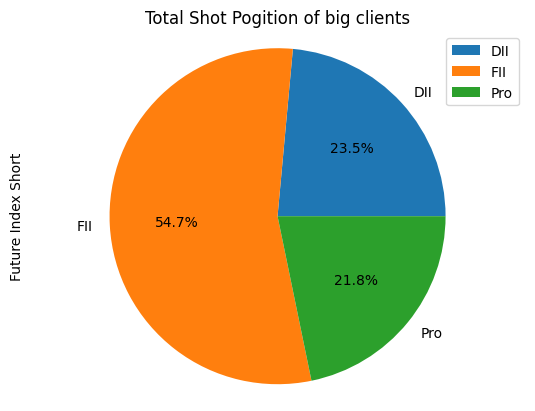

In [ ]:
Big_Institution_data_futures.plot(kind='pie', y="Future Index Short", labels=Big_Institution_data_futures['Client Type'], autopct='%1.1f%%')
plt.title('Total Shot Pogition of big clients')
plt.axis('equal')
plt.show()

In [ ]:
# colors = ['red' if val < 0 else 'green' for val in future_data['total_long_absolute']]
# ax = future_data.plot.bar(x="Client Type", y='total_long_absolute', color=colors)
# for i, bar in enumerate(ax.containers):
#     ax.bar_label(bar, label_type='edge', fontsize=10)

# # set labels and title
# ax.set_xlabel('Client')
# ax.set_ylabel('Long')
# ax.set_title('Total long and short')

# # show the plot
# plt.show()

**Option Data Analysis**

In [ ]:
Option_data=new_f_o_data_index[["Client Type","Option Index Call Long","Option Index Call Short","Option Index Put Long","Option Index Put Short","Total_Option_OI"]]
total_long_Option=Option_data["Option Index Call Long"].astype(float)+Option_data["Option Index Put Short"].astype(float)
total_short_Option=Option_data["Option Index Call Short"].astype(float)+Option_data["Option Index Put Long"].astype(float)
percentage_long_option=(total_long_Option/Option_data["Total_Option_OI"].astype(float))*100
percentage_short_option=(total_short_Option/Option_data["Total_Option_OI"].astype(float))*100
net_long=total_long_Option-total_short_Option
Option_data=pd.concat([Option_data,pd.DataFrame(total_long_Option)],axis=1)
Option_data=Option_data.rename(columns={0:"total_long_Option"})

In [ ]:
Option_data=pd.concat([Option_data,pd.DataFrame(total_short_Option)],axis=1)
Option_data=Option_data.rename(columns={0:"total_short_Option"})

In [ ]:
Option_data=pd.concat([Option_data,pd.DataFrame(percentage_long_option)],axis=1)
Option_data=Option_data.rename(columns={0:"percentage_long_option"})

In [ ]:
Option_data=pd.concat([Option_data,pd.DataFrame(percentage_short_option)],axis=1)
Option_data=Option_data.rename(columns={0:"percentage_short_option"})

In [ ]:
Option_data=pd.concat([Option_data,pd.DataFrame(net_long)],axis=1)
Option_data=Option_data.rename(columns={0:"net_long"})

In [ ]:
Option_data = Option_data.drop(Option_data.index[-1])

In [ ]:
Option_data

,Client Type,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Option_OI,total_long_Option,total_short_Option,percentage_long_option,percentage_short_option,net_long
1,Client,4292713,4337751,4156784,4205354,16992602,8498067.0,8494535.0,50.010393,49.989607,3532.0
2,DII,401,0,26090,0,26491,401.0,26090.0,1.513722,98.486278,-25689.0
3,FII,871702,668089,892874,647400,3080065,1519102.0,1560963.0,49.320453,50.679547,-41861.0
4,Pro,1301071,1460047,1305486,1528480,5595084,2829551.0,2765533.0,50.572092,49.427908,64018.0


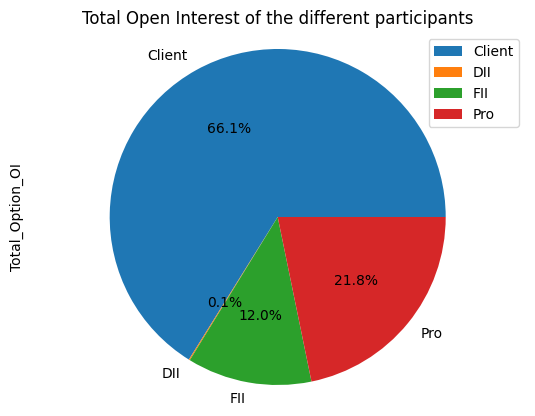

In [ ]:
Option_data.plot(kind='pie', y="Total_Option_OI", labels=Option_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Open Interest of the different participants')
plt.axis('equal')
plt.show()

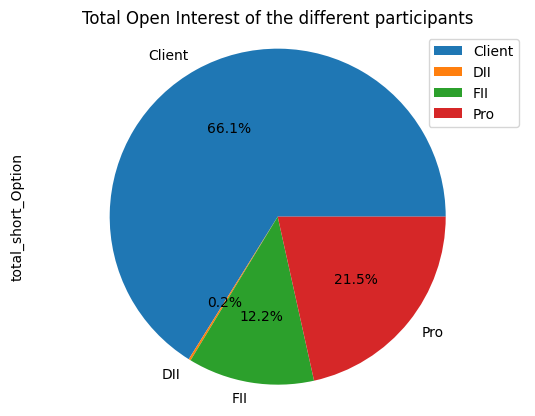

In [ ]:
Option_data["total_short_Option"]=Option_data["total_short_Option"].astype(int)
Option_data.plot(kind='pie', y="total_short_Option", labels=Option_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Open Interest of the different participants')
plt.axis('equal')
plt.show()

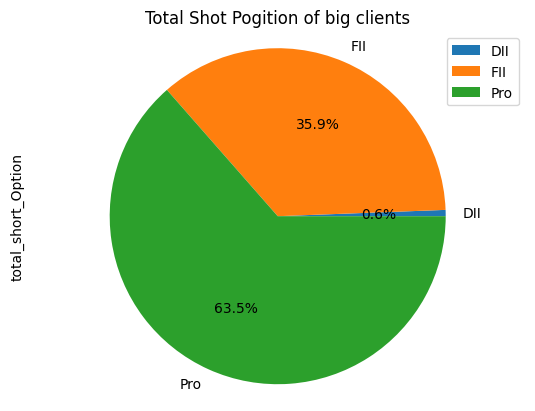

In [ ]:
Big_Institution_data = Option_data.drop(index=1)
Big_Institution_data.plot(kind='pie', y="total_short_Option", labels=Big_Institution_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Shot Pogition of big clients')
plt.axis('equal')
plt.show()

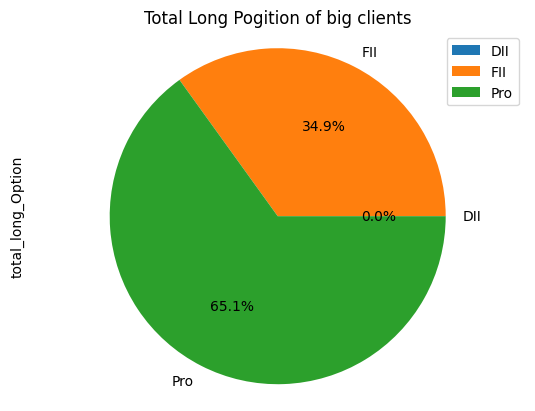

In [ ]:
Big_Institution_data.plot(kind='pie', y="total_long_Option", labels=Big_Institution_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Long Pogition of big clients')
plt.axis('equal')
plt.show()

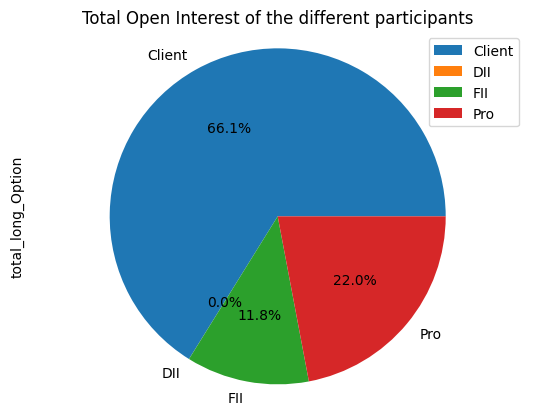

In [ ]:
Option_data["total_long_Option"]=Option_data["total_long_Option"].astype(int)
Option_data.plot(kind='pie', y="total_long_Option", labels=Option_data['Client Type'], autopct='%1.1f%%')
plt.title('Total Open Interest of the different participants')
plt.axis('equal')
plt.show()

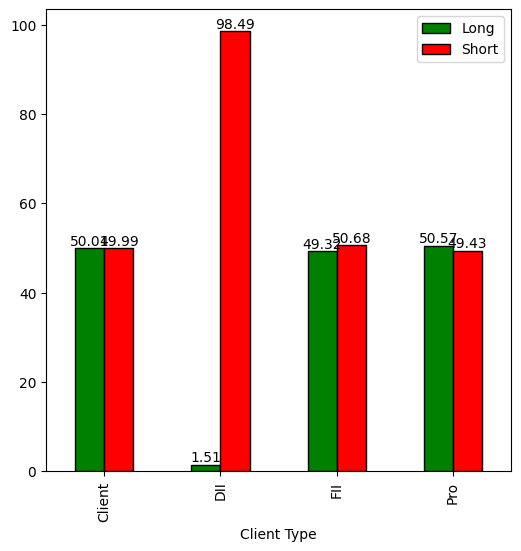

In [ ]:
long_short=Option_data[["percentage_long_option","percentage_short_option"]]
long_short=long_short.round(2)
long_short.set_index(Option_data["Client Type"], inplace=True)
ax = long_short.plot(kind='bar',color=['green', 'red'], edgecolor='black')
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', fontsize=10)
ax.legend(['Long','Short'])
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

In [ ]:
Option_data

,Client Type,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Option_OI,total_long_Option,total_short_Option,percentage_long_option,percentage_short_option,net_long
1,Client,4292713,4337751,4156784,4205354,16992602,8498067,8494535,50.010393,49.989607,3532.0
2,DII,401,0,26090,0,26491,401,26090,1.513722,98.486278,-25689.0
3,FII,871702,668089,892874,647400,3080065,1519102,1560963,49.320453,50.679547,-41861.0
4,Pro,1301071,1460047,1305486,1528480,5595084,2829551,2765533,50.572092,49.427908,64018.0


**FII Data Analysis**

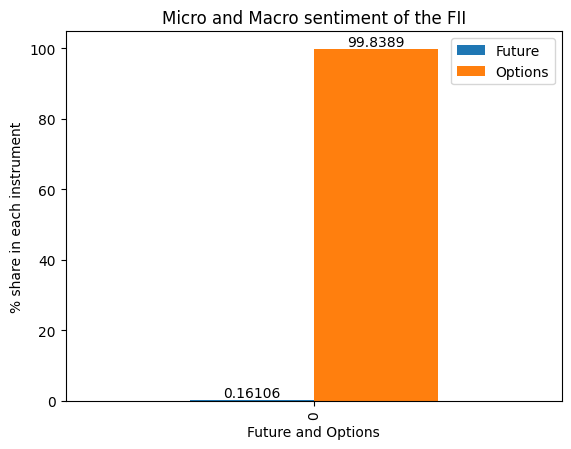

In [ ]:
FII_activity_in_futures=(float(new_statstics_data_FII.iloc[0,2])/(float(new_statstics_data_FII.iloc[0,2])+float(new_statstics_data_FII.iloc[6,2])))*100
FII_activity_in_options=(float(new_statstics_data_FII.iloc[6,2])/(float(new_statstics_data_FII.iloc[0,2])+float(new_statstics_data_FII.iloc[6,2])))*100
FII_activity_in_futures_nifty=(float(new_statstics_data_FII.iloc[4,2])/float(new_statstics_data_FII.iloc[0,2]))*100
FII_activity_in_futures_bank_nifty=(float(new_statstics_data_FII.iloc[2,2])/float(new_statstics_data_FII.iloc[0,2]))*100
FII_activity_in_option_nifty=(float(new_statstics_data_FII.iloc[7,2])/float(new_statstics_data_FII.iloc[6,2]))*100
FII_activity_in_option_bank_nifty=(float(new_statstics_data_FII.iloc[10,2])/float(new_statstics_data_FII.iloc[6,2]))*100
data = {'Future': [FII_activity_in_futures],
        'Options': [FII_activity_in_options]}
df=pd.DataFrame(data)
ax=df.plot.bar()
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', fontsize=10)
ax.set_xlabel('Future and Options')
ax.set_ylabel('% share in each instrument')
ax.set_title('Micro and Macro sentiment of the FII')
plt.show()

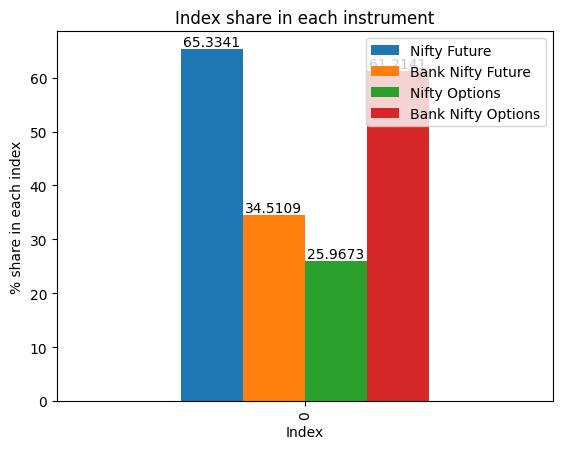

In [ ]:
data_index = {'Nifty Future': [FII_activity_in_futures_nifty],'Bank Nifty Future': [FII_activity_in_futures_bank_nifty],'Nifty Options': [FII_activity_in_option_nifty],'Bank Nifty Options': [FII_activity_in_option_bank_nifty]}
df_index=pd.DataFrame(data_index)
ax=df_index.plot.bar()
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', fontsize=10)
ax.set_xlabel('Index')
ax.set_ylabel('% share in each index')
ax.set_title('Index share in each instrument')
plt.show()

**Data Analysis over all participants Futures**

In [ ]:
Big_Institution_data_futures

,Client Type,Future Index Long,Future Index Short,Total_Future_OI,percentage_long,percentage_short,total_long_absolute
2,DII,48180,37401,85581,56.297543,43.702457,10779.0
3,FII,84435,86885,171320,49.284964,50.715036,-2450.0
4,Pro,37662,34570,72232,52.140326,47.859674,3092.0


In [ ]:

new_data=Big_Institution_data_futures[["Client Type","total_long_absolute"]]
xox=new_data.T
xox.columns=xox.iloc[0]
xox=xox.drop("Client Type")
xox=xox.rename({'Client Type': 'Date', 'total_long_absolute': Date})
xox = xox.rename(columns={'Client Type': 'Date'})
xox.insert(loc=0, column='Date', value=Date)
# final_file=pd.concat([data_2, xox], axis=0)
final_file=xox
final_file.to_csv('Sentiment_Estimator.csv', mode='a', header=False, index=False)

In [ ]:
data_2=pd.read_csv("Sentiment_Estimator.csv")
mom=data_2.shape
pop=mom[0]
pop

5

In [ ]:
data_2

,Date,DII,FII,Pro
0,04-04-2023,19488.0,-8110.0,-1854.0
1,05-05-2023,23579.0,-15787.0,-3263.0
2,08-05-2023,10779.0,-2450.0,3092.0
3,09-05-2023,8504.0,-7694.0,13341.0
4,09-05-2023,10779.0,-2450.0,3092.0


In [ ]:
tot=data_2.iloc[pop-1,1:]-data_2.iloc[pop-2,1:]
tot=pd.DataFrame(tot)
tot=tot.T
tot = tot.rename(columns={'DII': 'Change in OI in DII','FII': 'Change in OI in FII','Pro': 'Change in OI in Pro'})
tot=tot.rename({0: pop-1})
tot

,Change in OI in DII,Change in OI in FII,Change in OI in Pro
4,2275.0,5244.0,-10249.0


In [ ]:
new_data_1=pd.concat([data_2.iloc[:pop-1],tot],axis=1)
new_data_1.fillna(0,inplace=True)
new_data_1=pd.DataFrame(new_data_1.iloc[pop-1])
new_data_1=new_data_1.T
new_data_1.iloc[0,0]=Date
new_data_1.iloc[0,1]=data_2.iloc[pop-1,1]
new_data_1.iloc[0,2]=data_2.iloc[pop-1,2]
new_data_1.iloc[0,3]=data_2.iloc[pop-1,3]
new_data_1

,Date,DII,FII,Pro,Change in OI in DII,Change in OI in FII,Change in OI in Pro
4,09-05-2023,10779.0,-2450.0,3092.0,2275.0,5244.0,-10249.0


In [ ]:
new_data_1.to_csv('Final_1_file.csv', mode='a', header=False, index=False)

In [ ]:
dff=pd.read_csv('Final_1_file.csv')
dff

,Date,DII,FII,Pro,Change in OI in DII,Change in OI in FII,Change in OI in Pro
0,04-04-2023,19488.0,-8110.0,-1854.0,0.0,0.0,0.0
1,05-05-2023,23579.0,-15787.0,-3263.0,4091.0,-7677.0,-1409.0
2,08-05-2023,10779.0,-2450.0,3092.0,-12800.0,13337.0,6355.0
3,09-05-2023,8504.0,-7694.0,13341.0,-2275.0,-5244.0,10249.0
4,09-05-2023,10779.0,-2450.0,3092.0,2275.0,5244.0,-10249.0


In [ ]:
new_data_frame=pd.DataFrame({'Closing price of the nifty': [18255.80,18069,18264.40], 'Closing price of the Bank nifty': [43685.45,42661.20,43284.00]})
final_data_frame=pd.concat([dff,new_data_frame],axis=1)
final_data_frame

,Date,DII,FII,Pro,Change in OI in DII,Change in OI in FII,Change in OI in Pro,Closing price of the nifty,Closing price of the Bank nifty
0,04-04-2023,19488.0,-8110.0,-1854.0,0.0,0.0,0.0,18255.8,43685.45
1,05-05-2023,23579.0,-15787.0,-3263.0,4091.0,-7677.0,-1409.0,18069.0,42661.20
2,08-05-2023,10779.0,-2450.0,3092.0,-12800.0,13337.0,6355.0,18264.4,43284.00
3,09-05-2023,8504.0,-7694.0,13341.0,-2275.0,-5244.0,10249.0,NaN,NaN
4,09-05-2023,10779.0,-2450.0,3092.0,2275.0,5244.0,-10249.0,NaN,NaN


**Data Analysis over all participants Options**

In [ ]:
Big_Institution_data

,Client Type,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Total_Option_OI,total_long_Option,total_short_Option,percentage_long_option,percentage_short_option,net_long
2,DII,401,0,26090,0,26491,401.0,26090,1.513722,98.486278,-25689.0
3,FII,871702,668089,892874,647400,3080065,1519102.0,1560963,49.320453,50.679547,-41861.0
4,Pro,1301071,1460047,1305486,1528480,5595084,2829551.0,2765533,50.572092,49.427908,64018.0


In [ ]:
new_data=Big_Institution_data[["Client Type","net_long"]]
xox=new_data.T
xox.columns=xox.iloc[0]
xox=xox.drop("Client Type")
xox=xox.rename({'net_long': Date})
xox.insert(loc=0, column='Date', value=Date)
# # final_file=pd.concat([data_2, xox], axis=0)
final_file=xox
final_file.to_csv('Sentiment_Estimator_Options.csv', mode='a', header=False, index=False)

In [ ]:
dffo=pd.read_csv('Sentiment_Estimator_Options.csv')
dffo

,Date,DII,FII,Pro
0,04-05-2023,-20559.0,-53299.0,89617.0
1,05-05-2023,-21257.0,-146644.0,-380071.0
2,08-05-2023,-25689.0,-41861.0,64018.0
3,09-05-2023,-25689.0,-92274.0,-139071.0
4,09-05-2023,-25689.0,-41861.0,64018.0


In [ ]:
data_2=pd.read_csv("Sentiment_Estimator_Options.csv")
mom=data_2.shape
pop=mom[0]
pop

5

In [ ]:
data_2

,Date,DII,FII,Pro
0,04-05-2023,-20559.0,-53299.0,89617.0
1,05-05-2023,-21257.0,-146644.0,-380071.0
2,08-05-2023,-25689.0,-41861.0,64018.0
3,09-05-2023,-25689.0,-92274.0,-139071.0
4,09-05-2023,-25689.0,-41861.0,64018.0


In [ ]:
tot=data_2.iloc[pop-1,1:]-data_2.iloc[pop-2,1:]
tot=pd.DataFrame(tot)
tot=tot.T
tot = tot.rename(columns={'DII': 'Change in OI in DII','FII': 'Change in OI in FII','Pro': 'Change in OI in Pro'})
tot=tot.rename({0: pop-1})
tot

,Change in OI in DII,Change in OI in FII,Change in OI in Pro
4,0.0,50413.0,203089.0


In [ ]:
new_data_1=pd.concat([data_2.iloc[:pop-1],tot],axis=1)
new_data_1.fillna(0,inplace=True)
new_data_1=pd.DataFrame(new_data_1.iloc[pop-1])
new_data_1=new_data_1.T
new_data_1.iloc[0,0]=Date
new_data_1.iloc[0,1]=data_2.iloc[pop-1,1]
new_data_1.iloc[0,2]=data_2.iloc[pop-1,2]
new_data_1.iloc[0,3]=data_2.iloc[pop-1,3]
new_data_1

,Date,DII,FII,Pro,Change in OI in DII,Change in OI in FII,Change in OI in Pro
4,09-05-2023,-25689.0,-41861.0,64018.0,0.0,50413.0,203089.0


In [ ]:
new_data_1.to_csv('Final_1_file_Options.csv', mode='a', header=False, index=False)

In [ ]:
dff=pd.read_csv('Final_1_file_Options.csv')
dff

,Date,DII,FII,Pro,Change in OI in DII,Change in OI in FII,Change in OI in Pro
0,04-05-2023,-20559.0,-53299.0,89617.0,0.0,0.0,0.0
1,05-05-2023,-21257.0,-146644.0,-380071.0,-698.0,-93345.0,-469688.0
2,08-05-2023,-25689.0,-41861.0,64018.0,-4432.0,104783.0,444089.0
3,09-05-2023,-25689.0,-92274.0,-139071.0,0.0,-50413.0,-203089.0
4,09-05-2023,-25689.0,-41861.0,64018.0,0.0,50413.0,203089.0


In [ ]:
new_data_frame=pd.DataFrame({'Closing price of the nifty': [18255.80,18069,18264.40], 'Closing price of the Bank nifty': [43685.45,42661.20,43284.00]})
final_data_frame_Options=pd.concat([dff,new_data_frame],axis=1)
final_data_frame_Options

,Date,DII,FII,Pro,Change in OI in DII,Change in OI in FII,Change in OI in Pro,Closing price of the nifty,Closing price of the Bank nifty
0,04-05-2023,-20559.0,-53299.0,89617.0,0.0,0.0,0.0,18255.8,43685.45
1,05-05-2023,-21257.0,-146644.0,-380071.0,-698.0,-93345.0,-469688.0,18069.0,42661.20
2,08-05-2023,-25689.0,-41861.0,64018.0,-4432.0,104783.0,444089.0,18264.4,43284.00
3,09-05-2023,-25689.0,-92274.0,-139071.0,0.0,-50413.0,-203089.0,NaN,NaN
4,09-05-2023,-25689.0,-41861.0,64018.0,0.0,50413.0,203089.0,NaN,NaN
